In [1]:
import settings
from Fit_HuberBraun_Matrix_5param_AVB_First import Fit_HuberBraun_Matrix_5param_AVB_First

In [2]:
settings.init()

/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


[0.06048077095650687, 0.30240385478253434, 0.3027670731597148, 8, 8, 2934.4000000000015, 2855.2999999999993, 1784.0999999999995, 1778.6000000000004, 1.6283421840890877, 1.577914661671365]


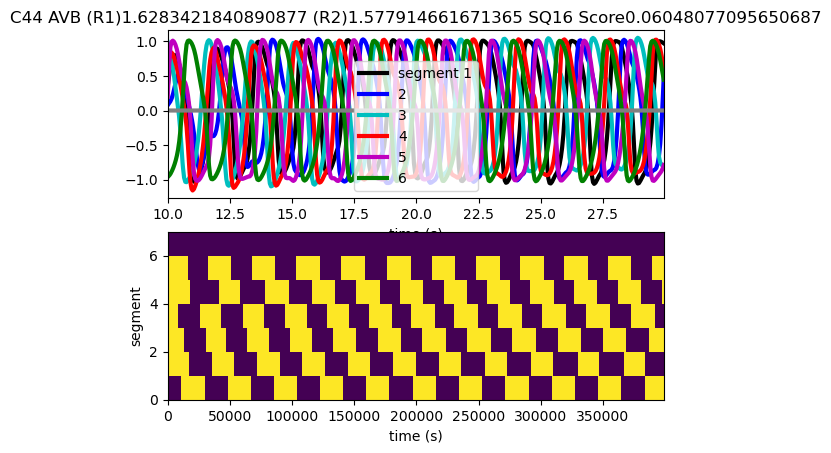

In [3]:
params = [44, 0.000363000000000000, 5.45726102941647e-06, 0.00167208415554239,0.000660000000000000]
r1 = params[0]
ubestAVB = params[1:]
t, y = Fit_HuberBraun_Matrix_5param_AVB_First(ubestAVB, r1, test=True)
V = y[0:settings.numCells, :]
asd = y[settings.numCells:2*settings.numCells, :]
asr = y[2*settings.numCells:3*settings.numCells, :]
s = y[3*settings.numCells:4*settings.numCells, :]

dorsalmuscles = [11, 12, 13]
ventralmuscles = [14, 15, 16]
dorsal_inds = []
ventral_inds = []
for i in range(6):
    for j in range(len(dorsalmuscles)):
        dorsal_inds.append(dorsalmuscles[j] + i*17)
    for j in range(len(ventralmuscles)):
        ventral_inds.append(ventralmuscles[j] + i*17)

dorsal_muscle_V = V[dorsal_inds, :]
ventral_muscle_V = V[ventral_inds, :]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(dorsal_muscle_V[:, -1] - ventral_muscle_V[:, -1])

[ 38.04296084  43.2692652   45.11221009  19.84514955  25.69166491
  23.66917736 -38.41512441 -39.40473149   2.51987698  26.05448257
  30.61056088  24.61640965 -25.84758444 -27.33108842   4.62979479
  20.54915438  23.50718997  18.3404397 ]


In [6]:
print(dorsal_muscle_V[:, 300] - ventral_muscle_V[:, 300])

[-20.58544745 -22.38213107  -6.59143113 -26.47546347 -30.42474252
  15.51287107  32.77924412  37.98920878  42.84474138  22.22530257
  27.74304109  24.5211454  -34.00010827 -35.00062549  -0.69311033
  21.86991849  24.98935565  19.31093739]


In [7]:
d_minus_v = dorsal_muscle_V - ventral_muscle_V

In [8]:
max_vals = np.array([])
min_vals = np.array([])
for i in range(len(d_minus_v)):
    max_vals = np.append(max_vals, np.max(d_minus_v[i, 200:]))
    min_vals = np.append(min_vals, np.min(d_minus_v[i, 200:]))

print(max_vals)
print(min_vals)

[43.18756215 48.46691457 47.46666509 41.33956042 46.50314247 44.34423464
 41.14117834 46.41868179 46.63712619 41.22078881 46.47658106 45.77904189
 41.3736194  46.61753553 40.67423316 42.90865448 48.13432055 39.0137402 ]
[-39.80446219 -41.66887073 -18.41411426 -39.46016825 -41.15733974
 -17.30284704 -40.7781411  -42.38370667 -23.01515029 -39.96469019
 -41.42140814 -20.12365268 -40.80475167 -42.13268383  -7.2399942
 -41.86908632 -43.24928858 -27.64851808]


In [ ]:
total_sin_vals = np.array([])
for i in range(len(d_minus_v)):
    sin_vals = np.array([])
    for j in range(10):
        sin_vals = np.append(sin_vals, np.array(d_minus_v[i][:]*(np.sin((j)*np.pi/10))))
    sin_vals = sin_vals.reshape(10, 600)
    if i == 0:
        total_sin_vals = np.append(total_sin_vals, sin_vals[0:5])
        prev = sin_vals.copy()
        total_sin_vals = total_sin_vals.reshape(5, 600)
        continue
    total_sin_vals = np.append(total_sin_vals, sin_vals[0:5] + prev[5:10])
    prev = sin_vals.copy()
    total_sin_vals = total_sin_vals.reshape(5*(i+1), 600)
    if i == 17:
        total_sin_vals = np.append(total_sin_vals, sin_vals[5:10])
        total_sin_vals = total_sin_vals.reshape(5*(i+1)+5, 600)
print(total_sin_vals.shape)

(95, 600)


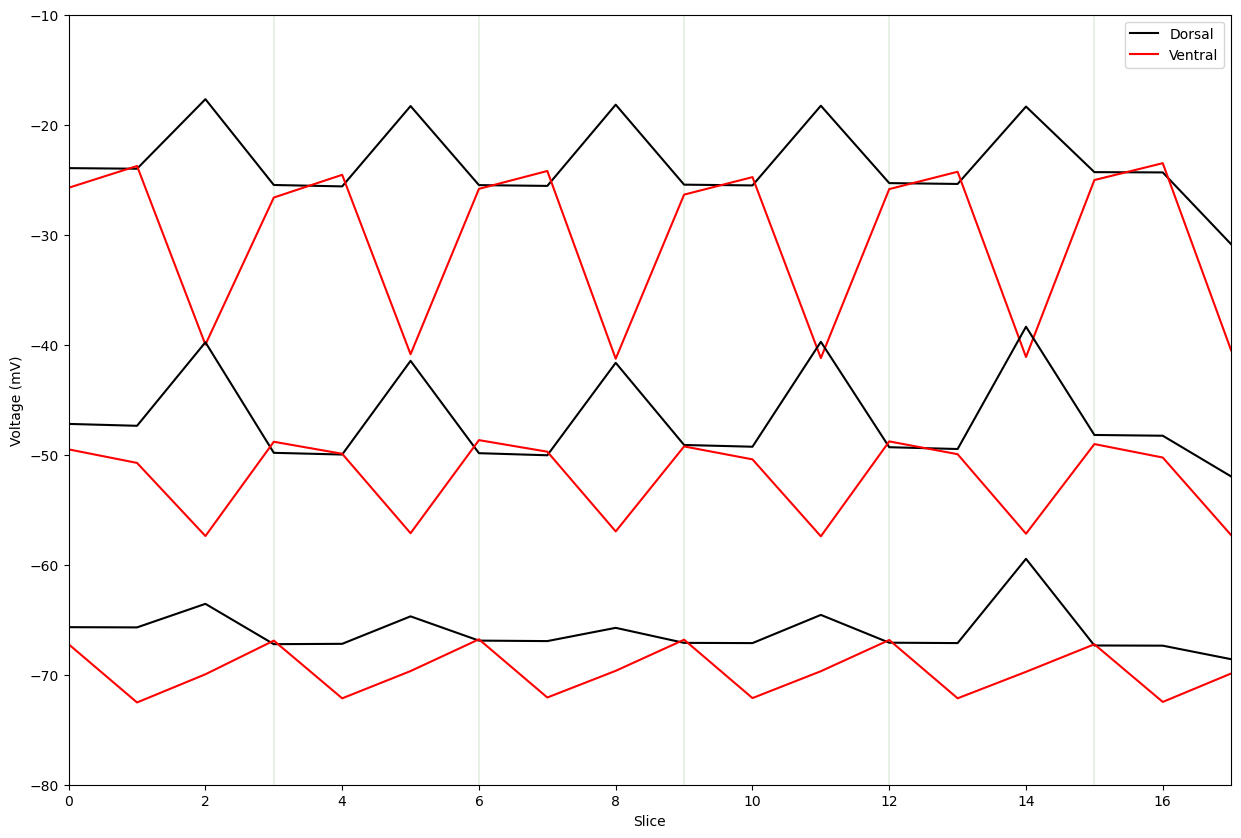

In [66]:
dorsal_max = np.max(dorsal_muscle_V[:, 200:], axis=1)
dorsal_min = np.min(dorsal_muscle_V[:, 200:], axis=1)   
dorsal_avg = np.mean(dorsal_muscle_V[:, 200:], axis=1)
ventral_max = np.max(ventral_muscle_V[:, 200:], axis=1)
ventral_min = np.min(ventral_muscle_V[:, 200:], axis=1)
ventral_avg = np.mean(ventral_muscle_V[:, 200:], axis=1)


plt.figure(figsize=(15, 10))
plt.vlines(range(0, 17, 3), ymin=-100, ymax=0, color="green", alpha=0.1)
plt.plot(dorsal_max, color="Black", label="Dorsal")
plt.plot(ventral_max, color="Red", label="Ventral")
plt.plot(dorsal_min, color="Black")
plt.plot(ventral_min, color="Red")
plt.plot(dorsal_avg, color="Black")
plt.plot(ventral_avg, color="Red")
plt.xlabel("Slice")
plt.ylabel("Voltage (mV)")
plt.xlim(0, 17)
plt.ylim(-80, -10)
plt.legend()

In [ ]:
dorsal_min = np.min(dorsal_muscle_V[:, 200:], axis=1)
ventral_min = np.min(ventral_muscle_V[:, 200:], axis=1)

In [118]:
dorsal_diff = np.array(dorsal_muscle_V[:, 200] - dorsal_min).reshape(18, 1)
ventral_diff = np.array(ventral_muscle_V[:, 200] - ventral_min).reshape(18, 1)

for i in range(399):
    dorsal_diff = np.append(dorsal_diff, np.subtract(dorsal_muscle_V[:, 200+i+1], dorsal_min).reshape(18, 1), axis=1)
    ventral_diff = np.append(ventral_diff, np.subtract(ventral_muscle_V[:, 200+i+1], ventral_min).reshape(18, 1), axis=1)

print(dorsal_diff.shape)
print(ventral_diff.shape)

(18, 400)
(18, 400)


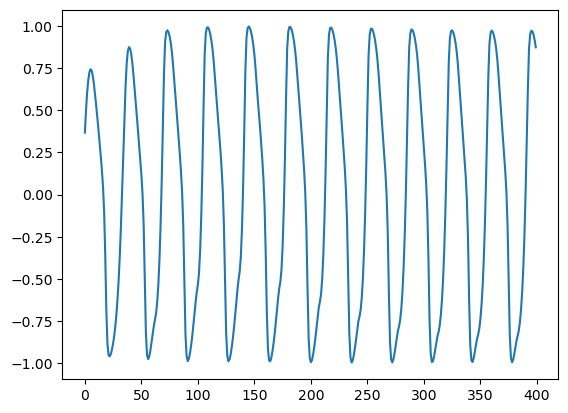

In [263]:
dorsal_strength = (dorsal_diff / (np.ones([18, 400]) * np.max(dorsal_diff, axis=1).reshape(18, 1))).reshape(18, 400)
ventral_strength = (ventral_diff / (np.ones([18, 400]) * np.max(ventral_diff, axis=1).reshape(18, 1))).reshape(18, 400)
plt.plot(dorsal_strength[0, :] - ventral_strength[0, :])
plt.show()

In [264]:
idx = np.array([1, 2, 3, 4, 5, 7, 8, 9, 10, 11])
relative_strengths = (1-abs(idx-6)/10)

final_dorsal = np.array([])
final_ventral = np.array([])
for i in range(400):
    next_step_dorsal = np.array([])
    next_step_ventral = np.array([])
    for j in range(18):
        curr_dorsal = dorsal_strength[j, i] * relative_strengths
        curr_ventral = ventral_strength[j, i] * relative_strengths
        
        if j == 0:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[0:5]).reshape(5, 1)
            prev_dorsal = curr_dorsal.copy()
            next_step_ventral = np.append(next_step_ventral, curr_ventral[0:5]).reshape(5, 1)
            prev_ventral = curr_ventral.copy()
            continue
        
        next_seg_dorsal = curr_dorsal[0:5] + prev_dorsal[5:10]
        next_step_dorsal = np.append(next_step_dorsal, next_seg_dorsal.reshape(5, 1), axis=0)
        prev_dorsal = curr_dorsal.copy()
        
        next_seg_ventral = curr_ventral[0:5] + prev_ventral[5:10]
        next_step_ventral = np.append(next_step_ventral, next_seg_ventral.reshape(5, 1), axis=0)
        prev_ventral = curr_ventral.copy()

        if j == 17:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[5:10].reshape(5, 1), axis=0)
            next_step_ventral = np.append(next_step_ventral, curr_ventral[5:10].reshape(5, 1), axis=0)
    
    if i == 0:
        final_dorsal = next_step_dorsal
        final_ventral = next_step_ventral
    else:
        final_dorsal = np.append(final_dorsal, next_step_dorsal, axis=1)
        final_ventral = np.append(final_ventral, next_step_ventral, axis=1)

print(final_dorsal.shape)
print(final_ventral.shape)

(95, 400)
(95, 400)


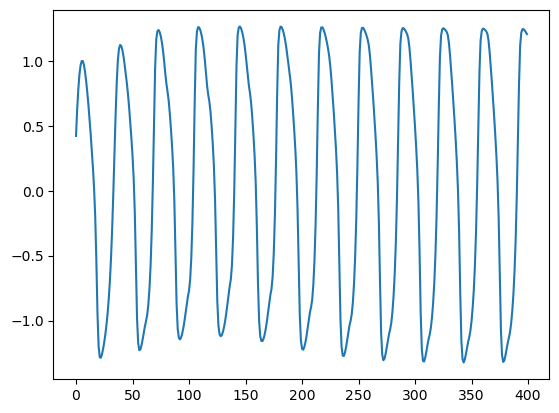

In [267]:
plt.plot(final_dorsal[10, :] - final_ventral[10, :])
plt.show()

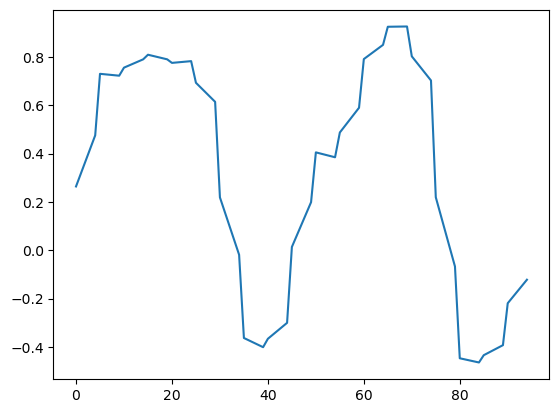

In [269]:
plt.plot(final_dorsal[:, 10] - final_ventral[:, 10])

In [266]:
dorsal_avg = np.mean(dorsal_muscle_V, axis=1)
ventral_avg = np.mean(ventral_muscle_V, axis=1)

dorsal_diff_from_avg = np.array(dorsal_muscle_V[:, 300] - dorsal_avg).reshape(18, 1)
ventral_diff_from_avg = np.array(ventral_muscle_V[:, 300] - ventral_avg).reshape(18, 1)

for i in range(299):
    dorsal_diff_from_avg = np.append(dorsal_diff_from_avg, np.subtract(dorsal_muscle_V[:, 300+i+1], dorsal_avg).reshape(18, 1), axis=1)
    ventral_diff_from_avg = np.append(ventral_diff_from_avg, np.subtract(ventral_muscle_V[:, 300+i+1], ventral_avg).reshape(18, 1), axis=1)

print(dorsal_diff_from_avg.shape)
print(ventral_diff_from_avg.shape)
print(np.max(dorsal_diff_from_avg, axis=1))
print(np.max(ventral_diff_from_avg, axis=1))

(18, 300)
(18, 300)
[25.05433433 25.1542261  25.30750112 26.00331123 26.02405646 25.67640752
 25.28479378 25.40508382 23.27816291 22.65413066 22.74826754 21.7968347
 22.49735526 22.58442715 18.33403351 22.07767551 22.12585973 19.38725354]
[21.5562825  24.30241985 15.03628166 20.40787794 23.10163899 14.19586243
 20.3650058  23.04506402 13.84352525 24.0295911  26.94108742 16.93717069
 24.35640246 27.26798754 16.9159834  25.609687   28.59781219 17.80095823]


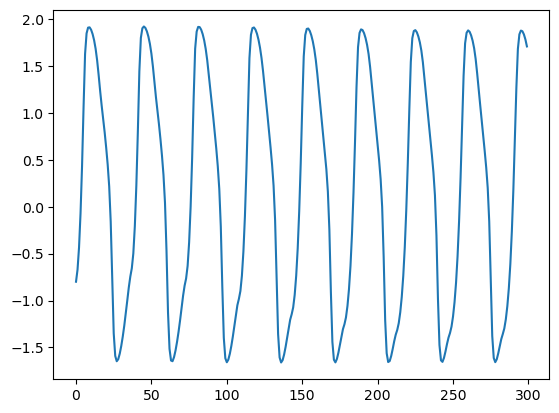

In [260]:
dorsal_strength_avg = (dorsal_diff_from_avg / (np.ones([18, 300]) * np.max(dorsal_diff_from_avg, axis=1).reshape(18, 1))).reshape(18, 300)
ventral_strength_avg = (ventral_diff_from_avg / (np.ones([18, 300]) * np.max(ventral_diff_from_avg, axis=1).reshape(18, 1))).reshape(18, 300)
plt.plot(dorsal_strength_avg[0, :] - ventral_strength_avg[0, :])
plt.show()


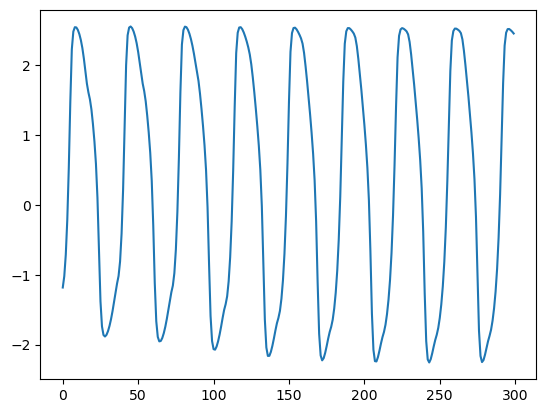

In [268]:
idx = np.array([1, 2, 3, 4, 5, 7, 8, 9, 10, 11])
relative_strengths = (1-abs(idx-6)/10)

final_dorsal_avg = np.array([])
final_ventral_avg = np.array([])
for i in range(300):
    next_step_dorsal = np.array([])
    next_step_ventral = np.array([])
    for j in range(18):
        curr_dorsal = dorsal_strength_avg[j, i] * relative_strengths
        curr_ventral = ventral_strength_avg[j, i] * relative_strengths
        
        if j == 0:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[0:5]).reshape(5, 1)
            prev_dorsal = curr_dorsal.copy()
            next_step_ventral = np.append(next_step_ventral, curr_ventral[0:5]).reshape(5, 1)
            prev_ventral = curr_ventral.copy()
            continue
        
        next_seg_dorsal = curr_dorsal[0:5] + prev_dorsal[5:10]
        next_step_dorsal = np.append(next_step_dorsal, next_seg_dorsal.reshape(5, 1), axis=0)
        prev_dorsal = curr_dorsal.copy()
        
        next_seg_ventral = curr_ventral[0:5] + prev_ventral[5:10]
        next_step_ventral = np.append(next_step_ventral, next_seg_ventral.reshape(5, 1), axis=0)
        prev_ventral = curr_ventral.copy()

        if j == 17:
            next_step_dorsal = np.append(next_step_dorsal, curr_dorsal[5:10].reshape(5, 1), axis=0)
            next_step_ventral = np.append(next_step_ventral, curr_ventral[5:10].reshape(5, 1), axis=0)
    
    if i == 0:
        final_dorsal_avg = next_step_dorsal
        final_ventral_avg = next_step_ventral
    else:
        final_dorsal_avg = np.append(final_dorsal_avg, next_step_dorsal, axis=1)
        final_ventral_avg = np.append(final_ventral_avg, next_step_ventral, axis=1)

plt.plot(final_dorsal_avg[10, :] - final_ventral_avg[10, :])

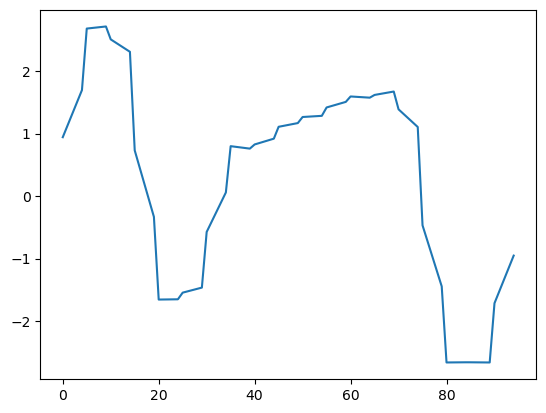

In [270]:
plt.plot(final_dorsal_avg[:, 10] - final_ventral_avg[:, 10])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


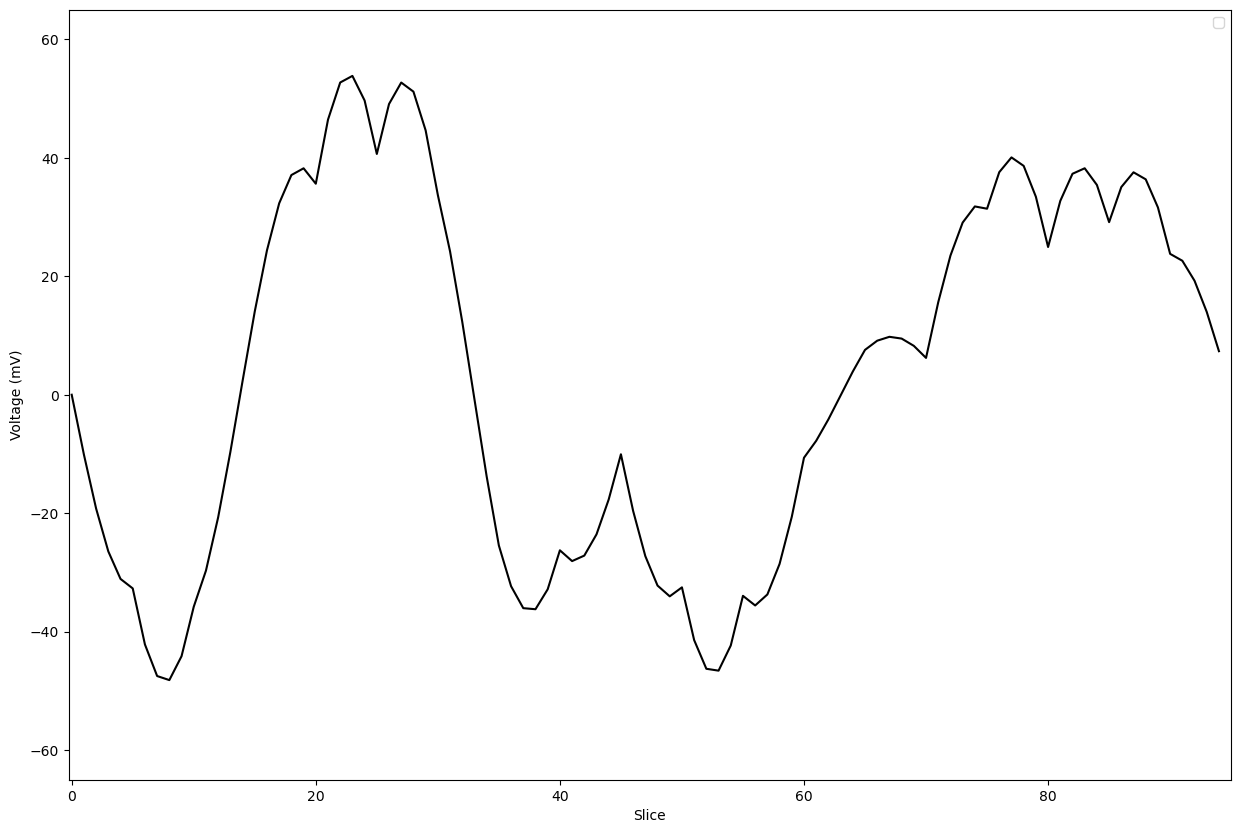

In [24]:
plt.figure(figsize=(15, 10))
plt.plot(total_sin_vals[:,325], color="Black")
plt.xlabel("Slice")
plt.ylabel("Voltage (mV)")
plt.xlim(-0.25, 95)
plt.ylim(-65, 65)
plt.legend()

## The different voltages achieved by each segment
### Muscle 3 of each segment does not appear to reach the same negative values as the others

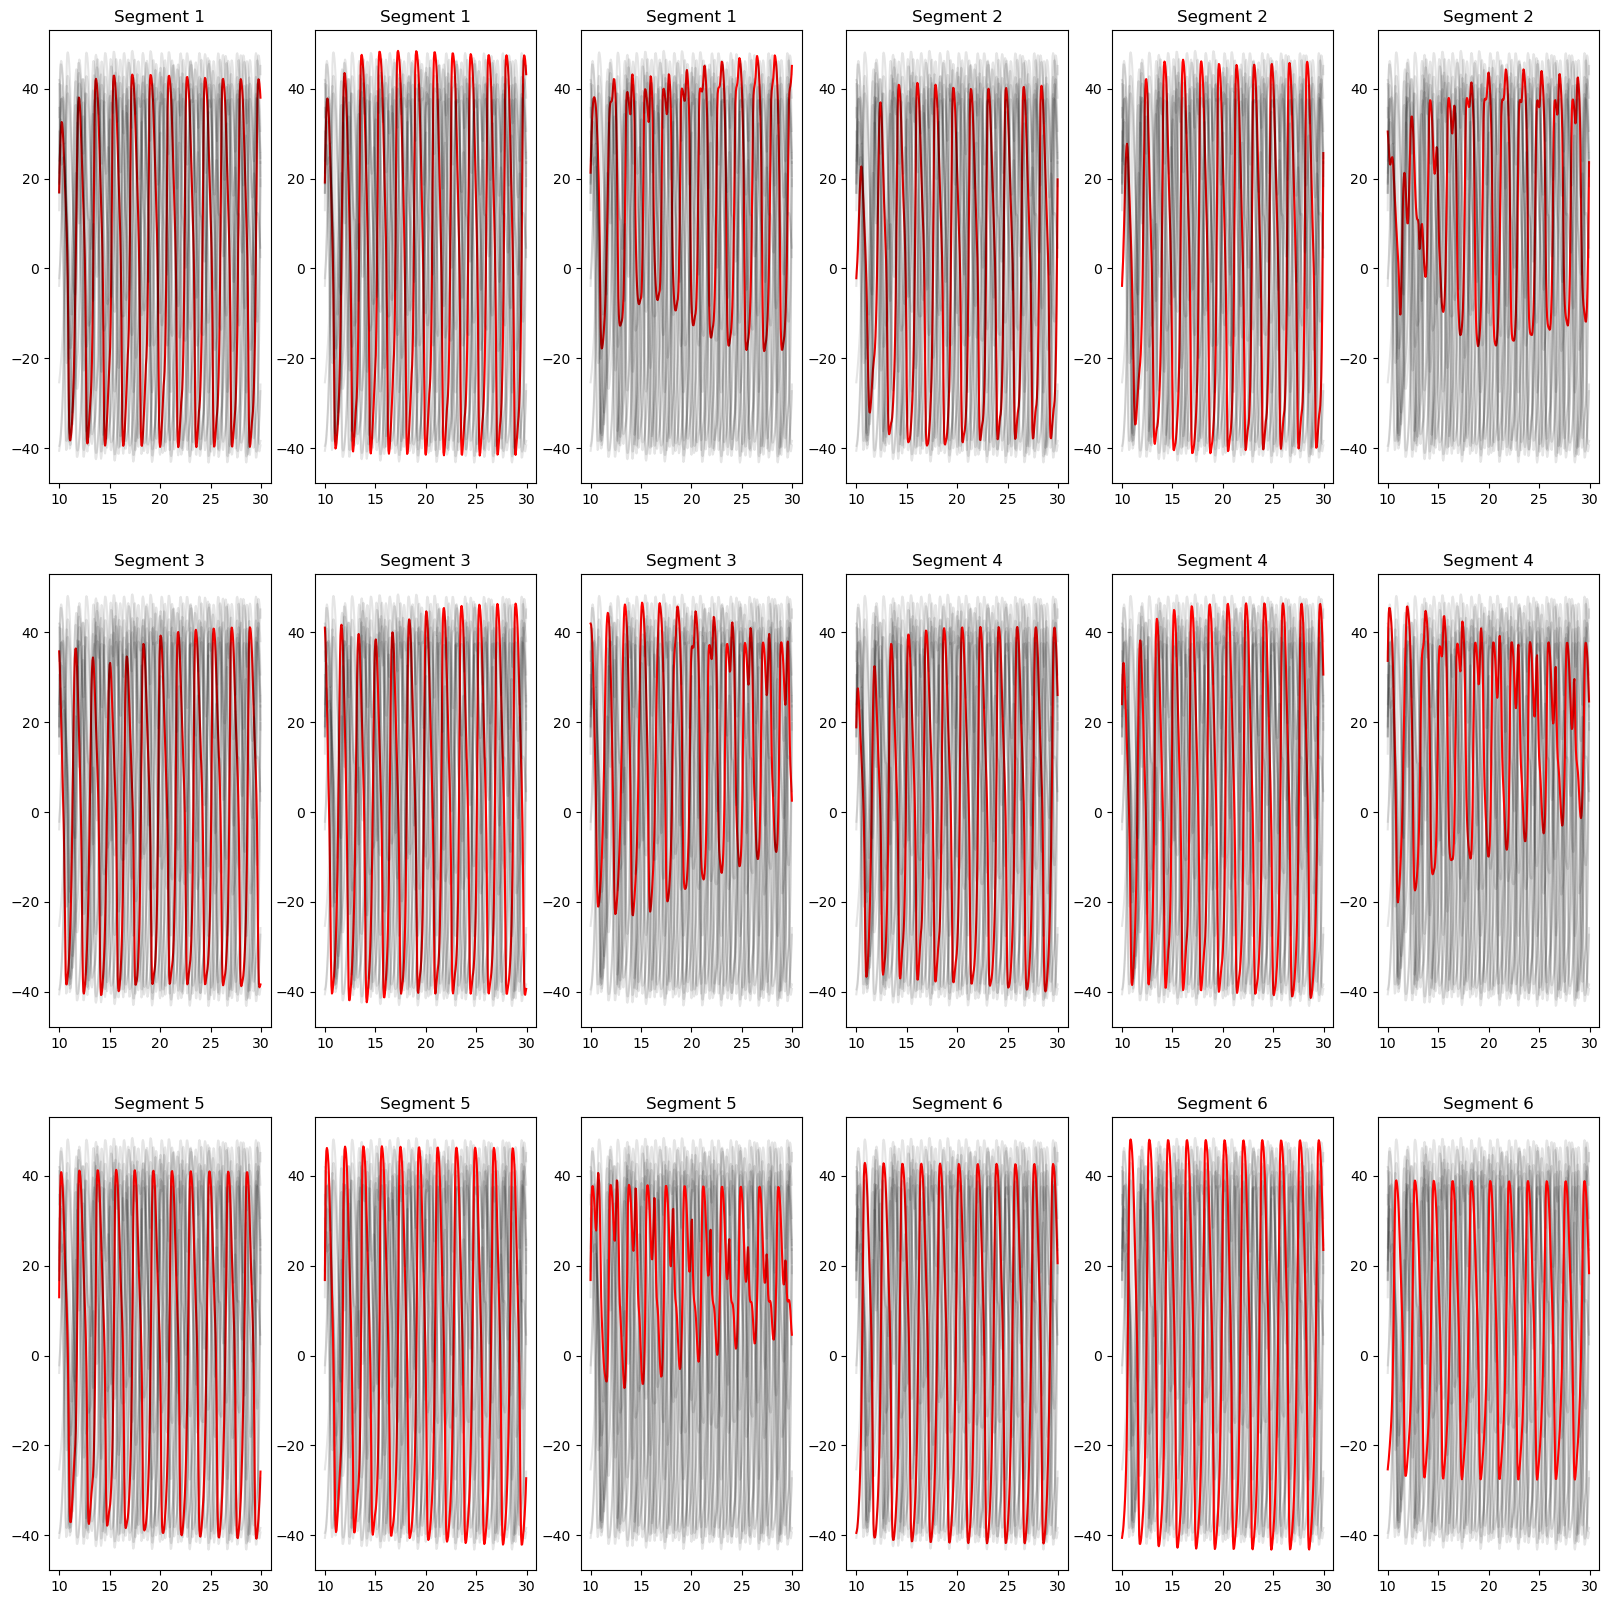

In [21]:
plt.figure(figsize=(20, 20))
for i in range(len(d_minus_v)):
    plt.subplot(3, 6, i+1)
    for j in range(len(d_minus_v)):
        if j == i:
            plt.plot(np.arange(200, 600)/20, d_minus_v[j, 200:], color="red")
            continue
        plt.plot(np.arange(200, 600)/20, d_minus_v[j, 200:], color="black", alpha=0.1)
    plt.title(f"Segment {i//3 + 1}")
plt.show()